<h2>Introduction</h2>
<p>
In this notebook we are going to apply an EDA the English Premier League player data set ranging from the 2015-16 to 2018-19 seasons. The dataset includes player positional data such as player age, fouls commited per season, season year scope, nation of the player, market value at beginning of season, and position of player.
</p>
<br>
<hr>
<br>
<h3> About the dataset </h3>

<p>
Data is pulled from premierleague.com and graciously compiled into csvs <a href="https://www.kaggle.com/datasets/dortmund4436/premier-league-player-stats-from-2015-to-2018" alt="link to kaggle data"> here </a>.
</p>


<br>
<hr>
<br>
<h4> Data Definitition </h4>

<p>

<strong> Player: </strong> Name of the player. <br>

<strong> Season: </strong> The season expressed in the starting and ending year where the features are scoped. <br>

<strong> Born: </strong> The year of the players birth. <br>

<strong> Nation: </strong> The country the player represents. <br>

<strong> Age: </strong> Number of years the player was during the season. <br>

<strong> Squad: </strong> The club where the player was registered for the given season. <br>

<strong> Previous Market Value: </strong> Market value of the player before the season started <br>

<strong> Position: </strong> General position player plays in. <br>

<strong> App: </strong> The number of appearances a player made for the specific season. <br>

<strong>Minutes</strong>: The total number of minutes played by a player during a match.<br>

<strong>Goals</strong>: The number of goals scored by a player during a match.<br>

<strong>Passes</strong>: The total number of successful passes made by a player during a match.<br>

<strong>Assists</strong>: The number of times a player has provided a pass or set up a goal-scoring opportunity for a teammate.<br>

<strong>Yellow</strong>: The number of yellow cards received by a player during a match, indicating a caution from the referee.<br>

<strong>Red</strong>: The number of red cards received by a player during a match, resulting in a dismissal from the game.<br>

<strong>SubOn</strong>: The number of times a player has been substituted onto the field during a match.<br>

<strong>SubOff</strong>: The number of times a player has been substituted off the field during a match.<br>

<strong>Shots</strong>: The total number of shots taken by a player during a match.<br>

<strong>SOT</strong>: The number of shots on target (SOT) taken by a player during a match, indicating shots that were aimed towards the goal.<br>

<strong>HitPost</strong>: The number of times a player's shot has hit the goalpost during a match.<br>

<strong>HeadClear</strong>: The number of times a player has successfully cleared the ball with their head during a match.<br>

<strong>HeadGoal</strong>: The number of goals scored by a player using their head during a match.<br>

<strong>PKScored</strong>: The number of penalty kicks successfully converted into goals by a player during a match.<br>

<strong>FKGoal</strong>: The number of goals scored by a player from a free-kick during a match.<br>

<strong>Offsides</strong>: The number of times a player has been caught in an offside position during a match.<br>

<strong>ThrBall</strong>: The number of through balls played by a player during a match, indicating a pass that splits the opposing defense and reaches a teammate.<br>

<strong>Misses</strong>: The number of shots or passes attempted by a player that did not reach the intended target.<br>

<strong>Corners</strong>: The number of corner kicks taken by a player during a match.<br>

<strong>Crosses</strong>: The number of crosses delivered by a player from wide areas into the opposition's penalty area during a match.<br>

<strong>Blocks</strong>: The number of times a player has blocked an opponent's shot or pass during a match.<br>

<strong>Interceptions</strong>: The number of times a player has intercepted the ball from an opponent during a match.<br>

<strong>Fouls</strong>: The number of fouls committed by a player during a match.<br>

<strong>Last man</strong>: A situation where a player is the last defender and risks conceding a goal if they fail to successfully defend against an attacking opponent.<br>

<strong>Tackles</strong>: The number of successful tackles made by a player during a match, indicating a defensive action to dispossess an opponent.<br>

<strong>ELG</strong>: Acronym for Expected Goals, a statistical measure estimating the probability of a shot resulting in a goal.<br>

<strong>OwnGoal</strong>: The number of own goals scored by a player during a match, where they inadvertently score a goal for the opposing team.<br>

<strong>Clears</strong>: The number of times a player has successfully cleared the ball from their team's defensive area during a match.<br>

<strong>ABW</strong>: Acronym for Aerial Battles Won, representing the number of aerial duels won by a player during a match, indicating successful challenges for the ball in the air.<br>

<strong>ABL</strong>: Acronym for Aerial Battles Lost, representing the number of aerial duels lost by a player during a match, indicating unsuccessful challenges for the ball in the air.<br>

</p>

<br>

<hr>

<br>

<h4> Hypothesis and Root Exploration Cause</h4>
<p> Due to the increase in television funding, the Premier League is experiencing an staggering inflation of player valuation. As a player value increases, I believe there is a point where market value outstrips the return on investment for what an individual player can bring to the club. More specifically, as a player projected value increases, it attracts more scouting attention thus further inflating the player demand and valuation. This EDA will explore at what value per position is a player statistically the best buy. As a secondary point, a commonly discussed issue known as "The English Tax" relates to a massive overvaluation of domestic players. Is this true when also comparing international players with very similar features?
</p>
<br>
<hr>

<h3> Setup of Data </h3>

<p> First steps, I will import all the required python libraries and configure the base directories so that loading each season's dataframe requires less change when moving the data between systems. Each season will have separate analytics completed before merging all seasons together for a roll up view.
</p>

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

basedir = os.path.dirname(os.path.abspath(__name__))

# Setting up Dataframe
df = pd.read_csv(os.path.join(basedir,'premierleague.csv'))

# Enable view of all features at once
pd.set_option('display.max_columns', None)
# Increase figure sizes
sbn.set(rc={"figure.figsize":(40, 12)})

<h4> Data Types and Values </h4>

All of the feature data types match what we want with the exception of season. The string value of "201x-201y" is clear, however, it doesn't make ordering very easy. I will be changing the Season to "Season Start Year" and converting the column into an int-based type. 
<p>


In [3]:
dtypes = df.dtypes

df.replace(to_replace=["2015-2016","2016-2017","2017-2018","2018-2019"], value=[2015,2016,2017,2018], inplace=True)

dtypes

Player                   object
Season                   object
Born                      int64
Age                       int64
Squad                    object
Nation                   object
Previous Market Value     int64
Market Value              int64
Position                 object
App                       int64
Minutes                   int64
Goals                     int64
Passes                    int64
Assists                   int64
Yellow                    int64
Red                       int64
SubOn                     int64
SubOff                    int64
Shots                     int64
SOT                       int64
HitPost                   int64
HeadClear                 int64
HeadGoal                  int64
PKScored                  int64
FKGoal                    int64
Offsides                  int64
ThrBall                   int64
Misses                    int64
Corners                   int64
Crosses                   int64
Blocks                    int64
Intercep

<h4> Dataframe Separation </h4>

<p> Value of a player is entirely based on the specific skills of his/her position. To give us a better understanding of what skills are correlated to market value, I will be separating each position into separate dataframes. I will also create a dataframe for the overall highest value players sorted in descending order of market value.
</p>

In [4]:
def_df = df[df["Position"] == "DF"]
fw_df = df[df["Position"] == "FW"]
mf_df = df[df["Position"] == "MF"]

In [5]:
highest_value = df.sort_values(by="Market Value", ascending=False)
highest_value.head(10)


,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,Minutes,Goals,Passes,Assists,Yellow,Red,SubOn,SubOff,Shots,SOT,HitPost,HeadClear,HeadGoal,PKScored,FKGoal,Offsides,ThrBall,Misses,Corners,Crosses,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
1026,Mohamed Salah,2018,1992,26,Liverpool,Egypt,135000000,165000000,FW,38,3256,22,1079,8,0,0,0,13,137,64,2,1,0,3,0,27,19,73,35,57,0,5,25,0,21,0,0,4,11,60
811,Kevin De Bruyne,2016,1991,25,Manchester City,Belgium,71500000,165000000,MF,36,2883,6,1801,18,4,0,3,11,86,21,9,3,0,0,1,2,31,3,137,275,1,24,37,0,50,0,0,8,14,27
812,Kevin De Bruyne,2017,1991,26,Manchester City,Belgium,165000000,143000000,MF,37,3083,8,2693,16,2,0,1,13,94,39,4,3,0,0,1,2,41,55,151,248,2,25,30,0,62,0,0,12,15,16
426,Eden Hazard,2018,1991,27,Chelsea,Belgium,99000000,135000000,FW,37,2925,16,1819,15,2,0,5,8,93,43,3,3,0,4,0,11,13,50,92,145,0,13,12,0,14,0,0,4,20,33
1025,Mohamed Salah,2017,1992,25,Liverpool,Egypt,88000000,135000000,FW,36,2921,32,946,10,1,0,2,17,144,67,3,2,2,1,0,17,8,77,62,86,0,5,16,0,12,0,0,3,13,35
565,Harry Kane,2018,1993,25,Tottenham,England,108000000,135000000,FW,28,2427,17,551,4,5,0,1,4,102,46,2,12,2,4,0,10,9,56,0,12,6,1,31,0,9,0,0,14,49,68
1168,Raheem Sterling,2018,1994,23,Manchester City,England,81000000,126000000,FW,34,2776,17,1263,10,3,0,3,9,77,39,3,1,2,0,0,13,6,38,19,75,3,17,40,0,32,0,0,4,15,28
387,Dele Alli,2018,1996,22,Tottenham,England,49500000,110000000,MF,25,1833,5,1028,3,4,0,3,12,39,19,0,9,4,0,0,3,18,20,3,10,5,19,23,0,33,0,0,17,20,20
283,Christian Eriksen,2017,1992,25,Tottenham,Denmark,88000000,110000000,MF,37,3226,10,2258,10,0,0,0,8,97,39,1,3,0,0,0,1,24,58,125,222,1,31,14,0,51,0,0,17,18,27
1148,Philip Billing,2018,1996,22,Huddersfield Town,Denmark,71500000,110000000,MF,27,2190,2,1074,0,7,0,2,6,42,9,3,23,1,0,0,2,0,33,2,56,16,53,37,0,74,0,0,40,88,30


<Axes: xlabel='Nation', ylabel='Market Value'>

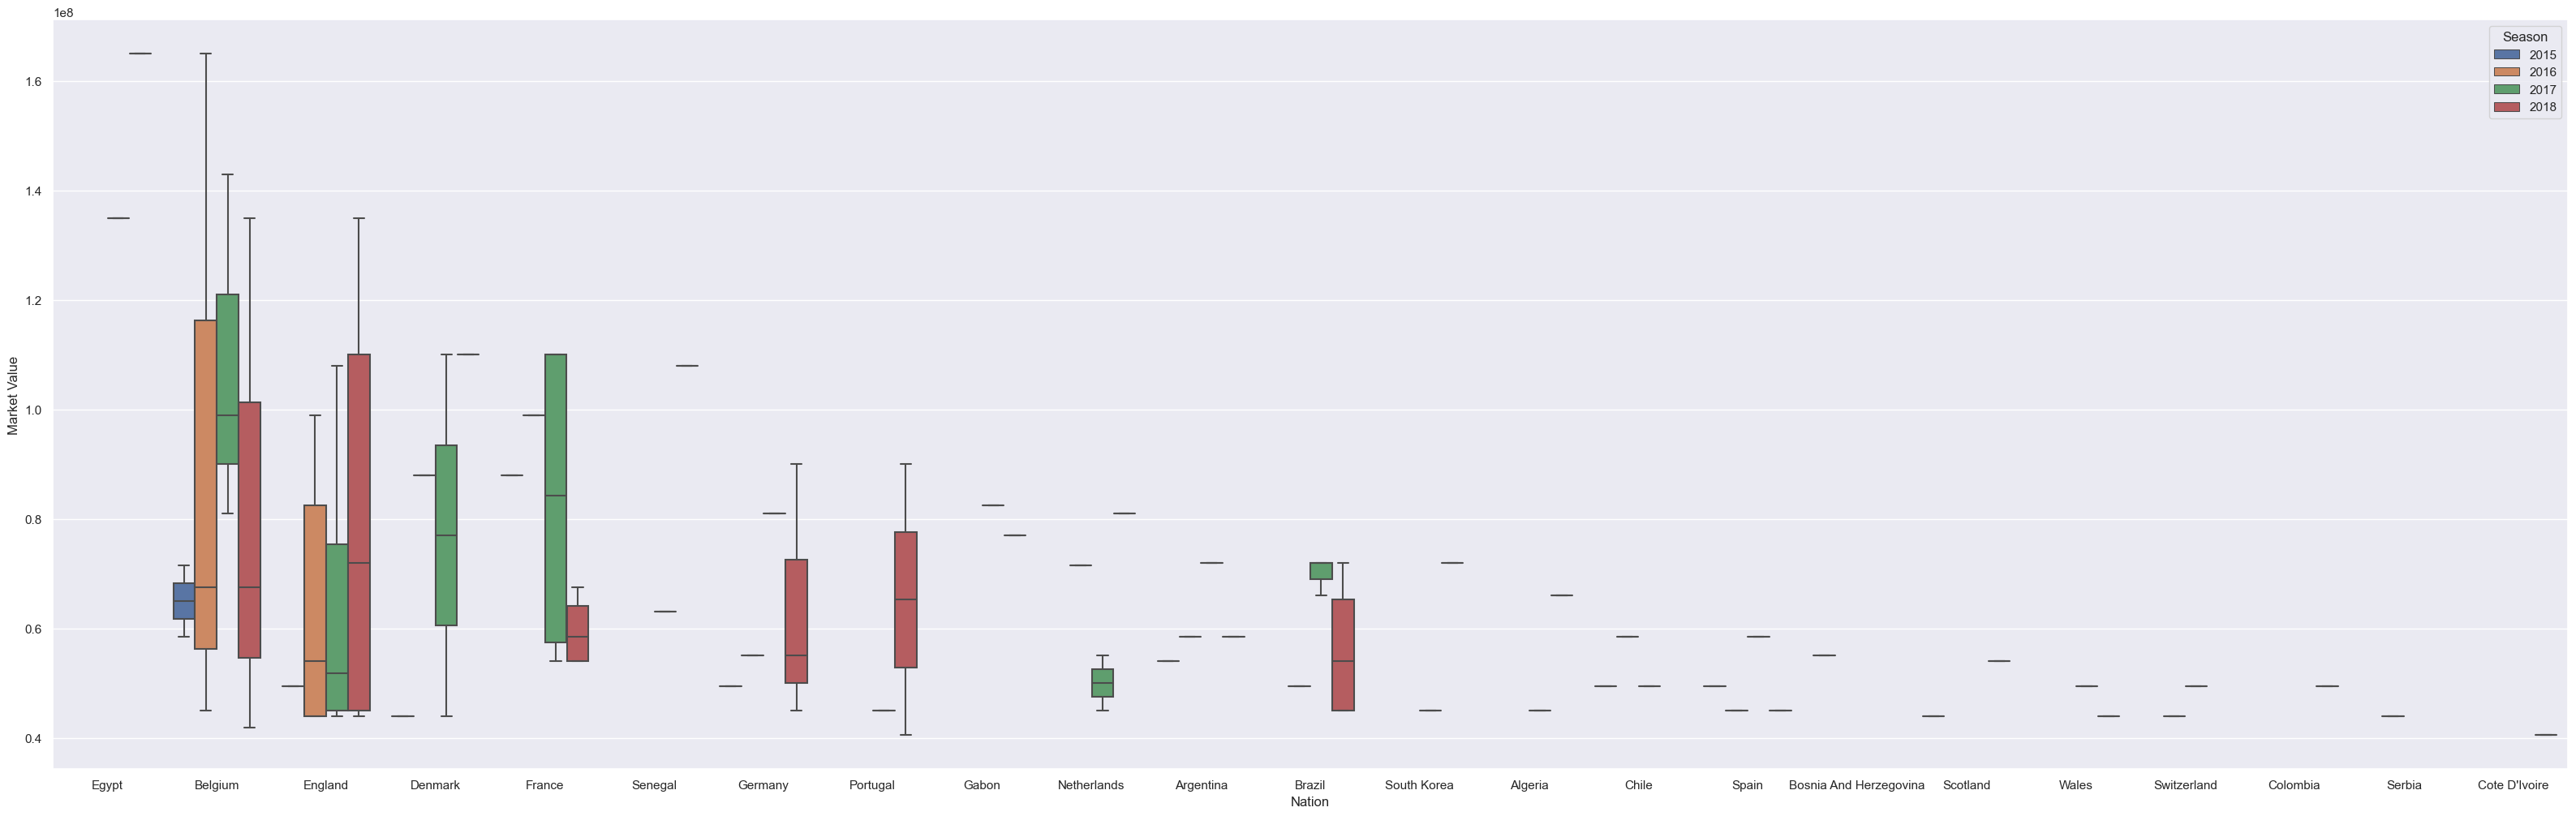

In [6]:
sbn.boxplot(highest_value[:100],x="Nation",y="Market Value", hue="Season")

<p> As we can see below, the data is heavily populated with English players making up over 21%, with Belgian players taking 11% and French at 10%. Egypt only has Salah as a representative of Egypt. 42% of all top valued players result from the same 3 countries. Is this a sign of specific nations provided high market value players or is this in line with the total amount of players from these countries?
</p>

In [7]:
highest_value[:100].loc[:,"Nation"].value_counts()




England                   21
Belgium                   11
France                    10
Brazil                     8
Germany                    7
Denmark                    5
Netherlands                4
Argentina                  4
Spain                      4
Chile                      3
Portugal                   3
Switzerland                2
Wales                      2
Scotland                   2
Egypt                      2
Algeria                    2
South Korea                2
Gabon                      2
Senegal                    2
Bosnia And Herzegovina     1
Colombia                   1
Serbia                     1
Cote D'Ivoire              1
Name: Nation, dtype: int64

<h4> Highly Paid National Ratio </h4>
<p>
By filtering each top 100 players nation, we can determine what percentage of our total register player dataset each Nation contained. We then calculate how many of each nation is represented in the top 100 most valuable players.
</p>

In [8]:
top_100_value_df = highest_value[:100].loc[:, 'Nation']

top_nations = {}

for i in top_100_value_df:
    if top_nations.get(i) != None:
        top_nations[i] += 1
    else:
        top_nations[i] = 1

total = highest_value["Nation"].count()

for k in top_nations.keys():
    counts = highest_value["Nation"].loc[highest_value["Nation"] == k].count()
    top_nations[k] = (round((top_nations[k] / counts)*100, 2), round((counts/total)*100, 2))

for i in top_nations.items():
    print(f"Of all {total} premier league players, {i[1][1]} percent of players are from {i[0]} and {i[1][0]} are in the Top 100 most valuable.")









Of all 1468 premier league players, 0.61 percent of players are from Egypt and 22.22 are in the Top 100 most valuable.
Of all 1468 premier league players, 4.16 percent of players are from Belgium and 18.03 are in the Top 100 most valuable.
Of all 1468 premier league players, 30.86 percent of players are from England and 4.64 are in the Top 100 most valuable.
Of all 1468 premier league players, 1.09 percent of players are from Denmark and 31.25 are in the Top 100 most valuable.
Of all 1468 premier league players, 5.79 percent of players are from France and 11.76 are in the Top 100 most valuable.
Of all 1468 premier league players, 1.98 percent of players are from Senegal and 6.9 are in the Top 100 most valuable.
Of all 1468 premier league players, 2.32 percent of players are from Germany and 20.59 are in the Top 100 most valuable.
Of all 1468 premier league players, 1.5 percent of players are from Portugal and 13.64 are in the Top 100 most valuable.
Of all 1468 premier league players, 0

<h4> Valuation Gap Between Top Paid Player Nationals </h4>

<p> What is the deviation between the top 100 players and their national teammates? By breaking down the dataset into only our previously captured top nations, we can see that England, Belgiumand France have the most significant IQR outliers with Chile's average player pay being above average. This doesn't stand out due to the limited pool of Chilean players at .27% of the dataset. What is surprising is the higher than average median market value of Brazilian players along with the significant portion of the player population at 3% total. 

</p>

<Axes: xlabel='Nation', ylabel='Market Value'>

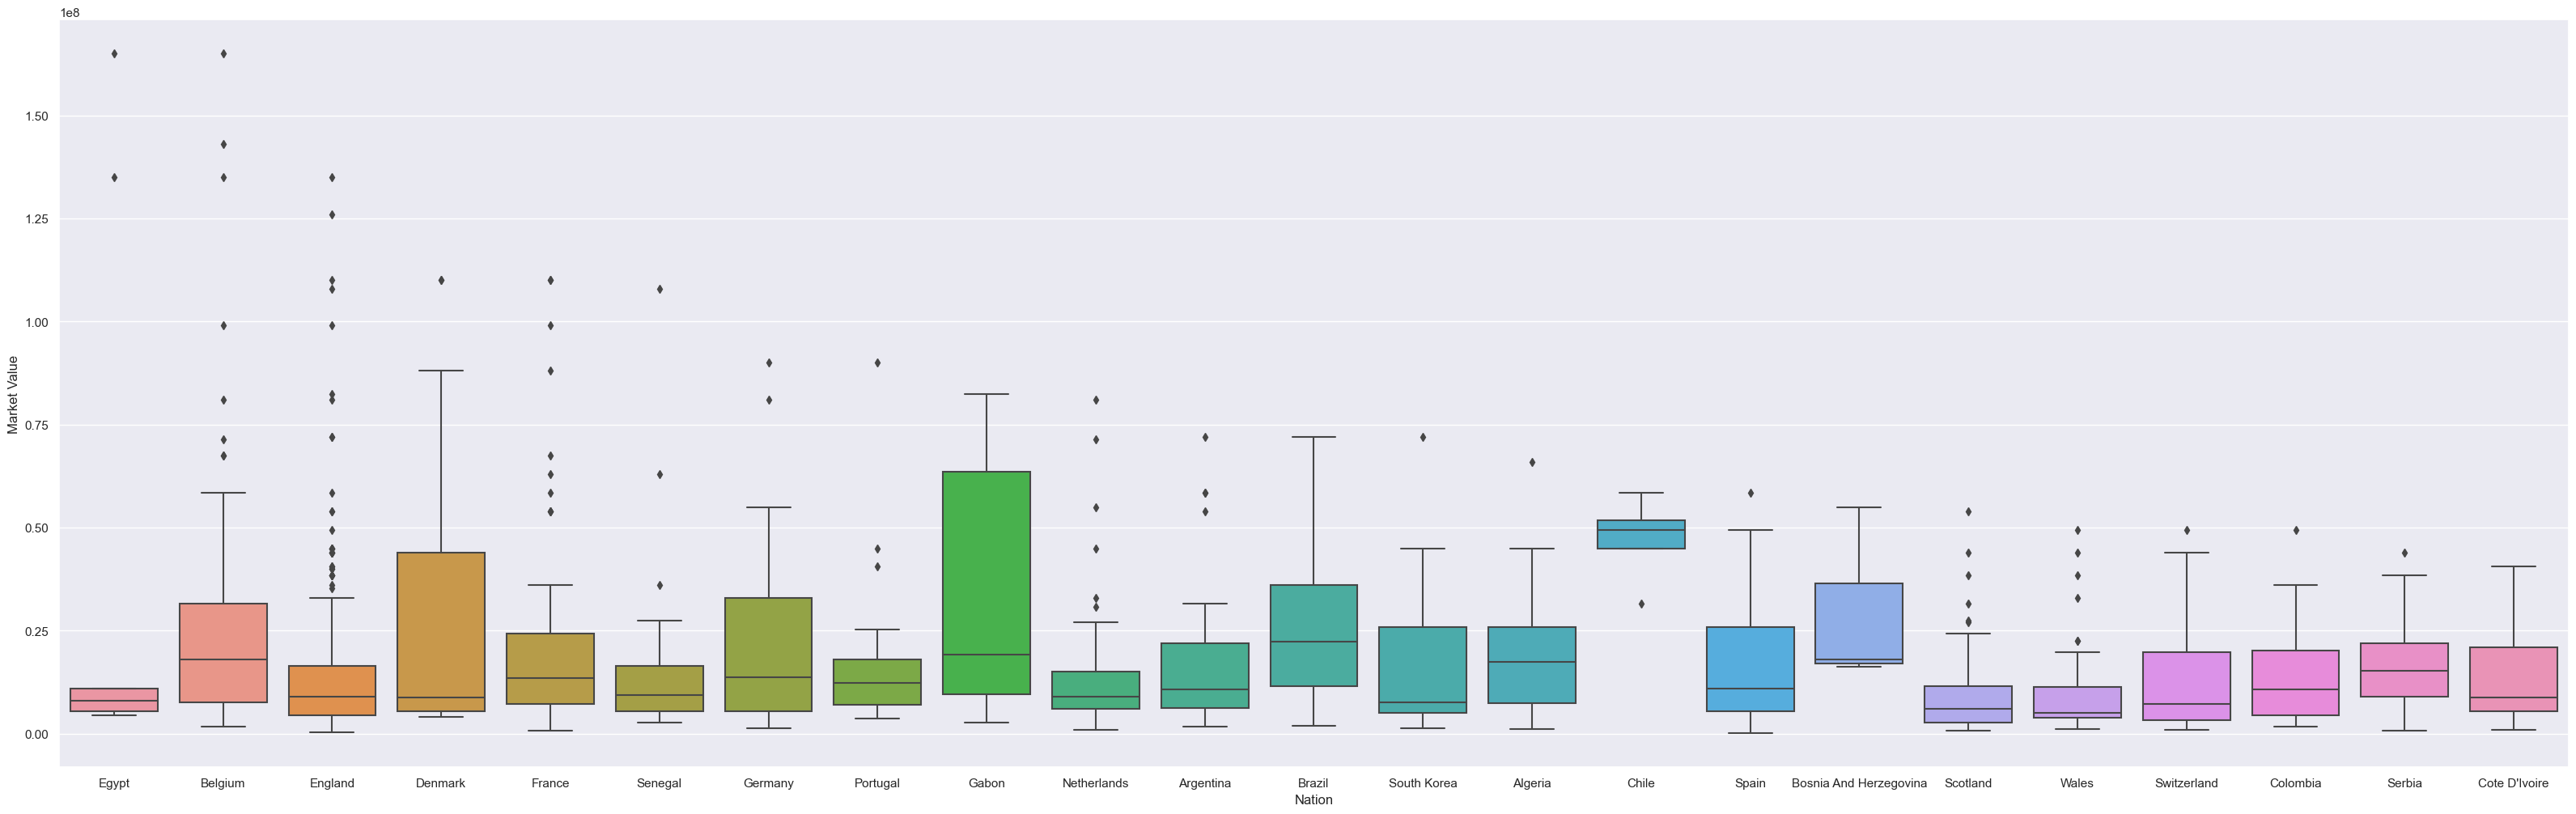

In [9]:
top_nation_keys = [k for k in top_nations.keys()]

top_paid_nation_counts = highest_value[highest_value["Nation"].isin(top_nation_keys)]

sbn.boxplot(top_paid_nation_counts, x='Nation', y='Market Value')

<h4> Positional Impact on Value </h4>
<p>
Assumptions are that forward players are traditionally the most expensive addition to a team, however, the modern game requires more of defenders and a spike in defender transfer fees may reflect a converging of average value. Virgil Van Dyke was one of the most expensive players in the premier league, and the most expensive defender ever.

Initially the absolute top value players from all seasons reflects very little defenders, however, there is an upward trend of Market Value by season when isolating the top 100 most valuable players for each season and using the countplot hue. Positional value is leveling out. Forward market value each season is losing majority while defenders and increasing rapidly.

</p>

<Axes: xlabel='Position', ylabel='count'>

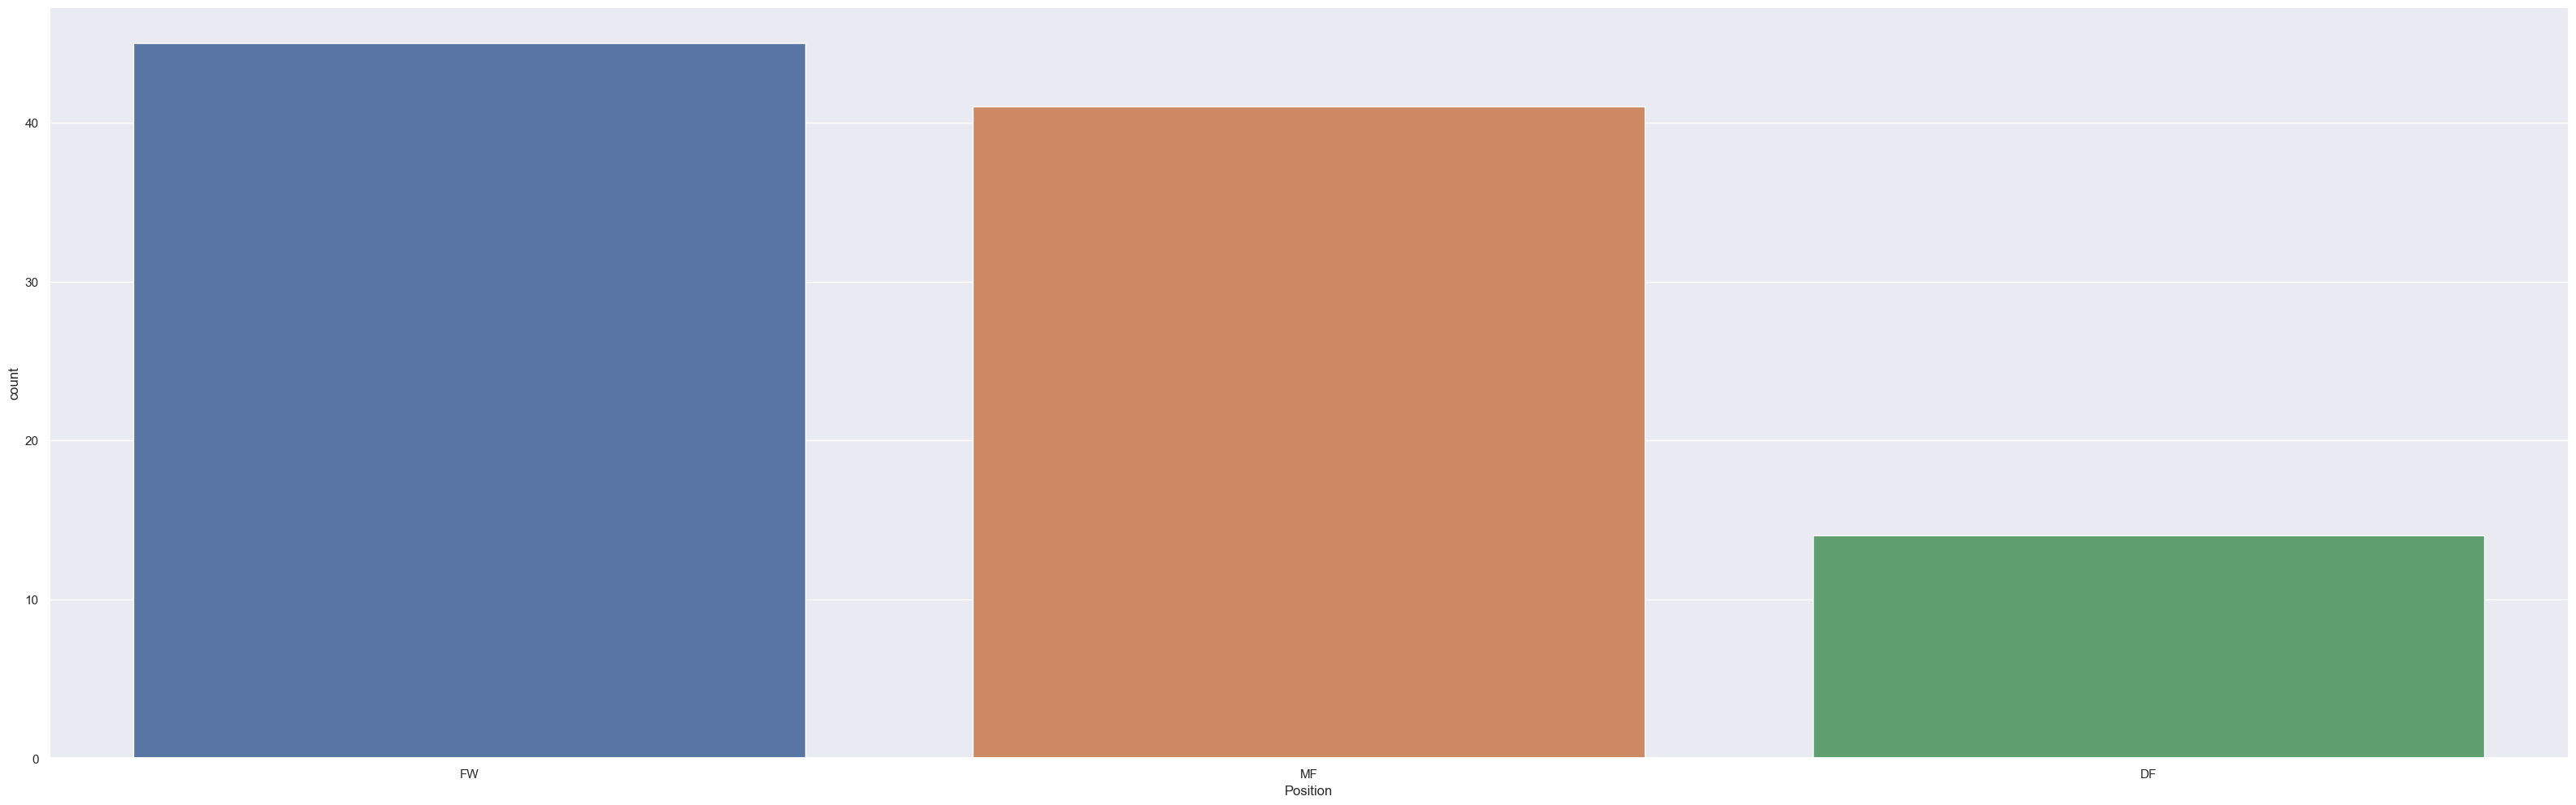

In [11]:
sbn.countplot(highest_value[:100], x="Position")

<Axes: xlabel='Position', ylabel='count'>

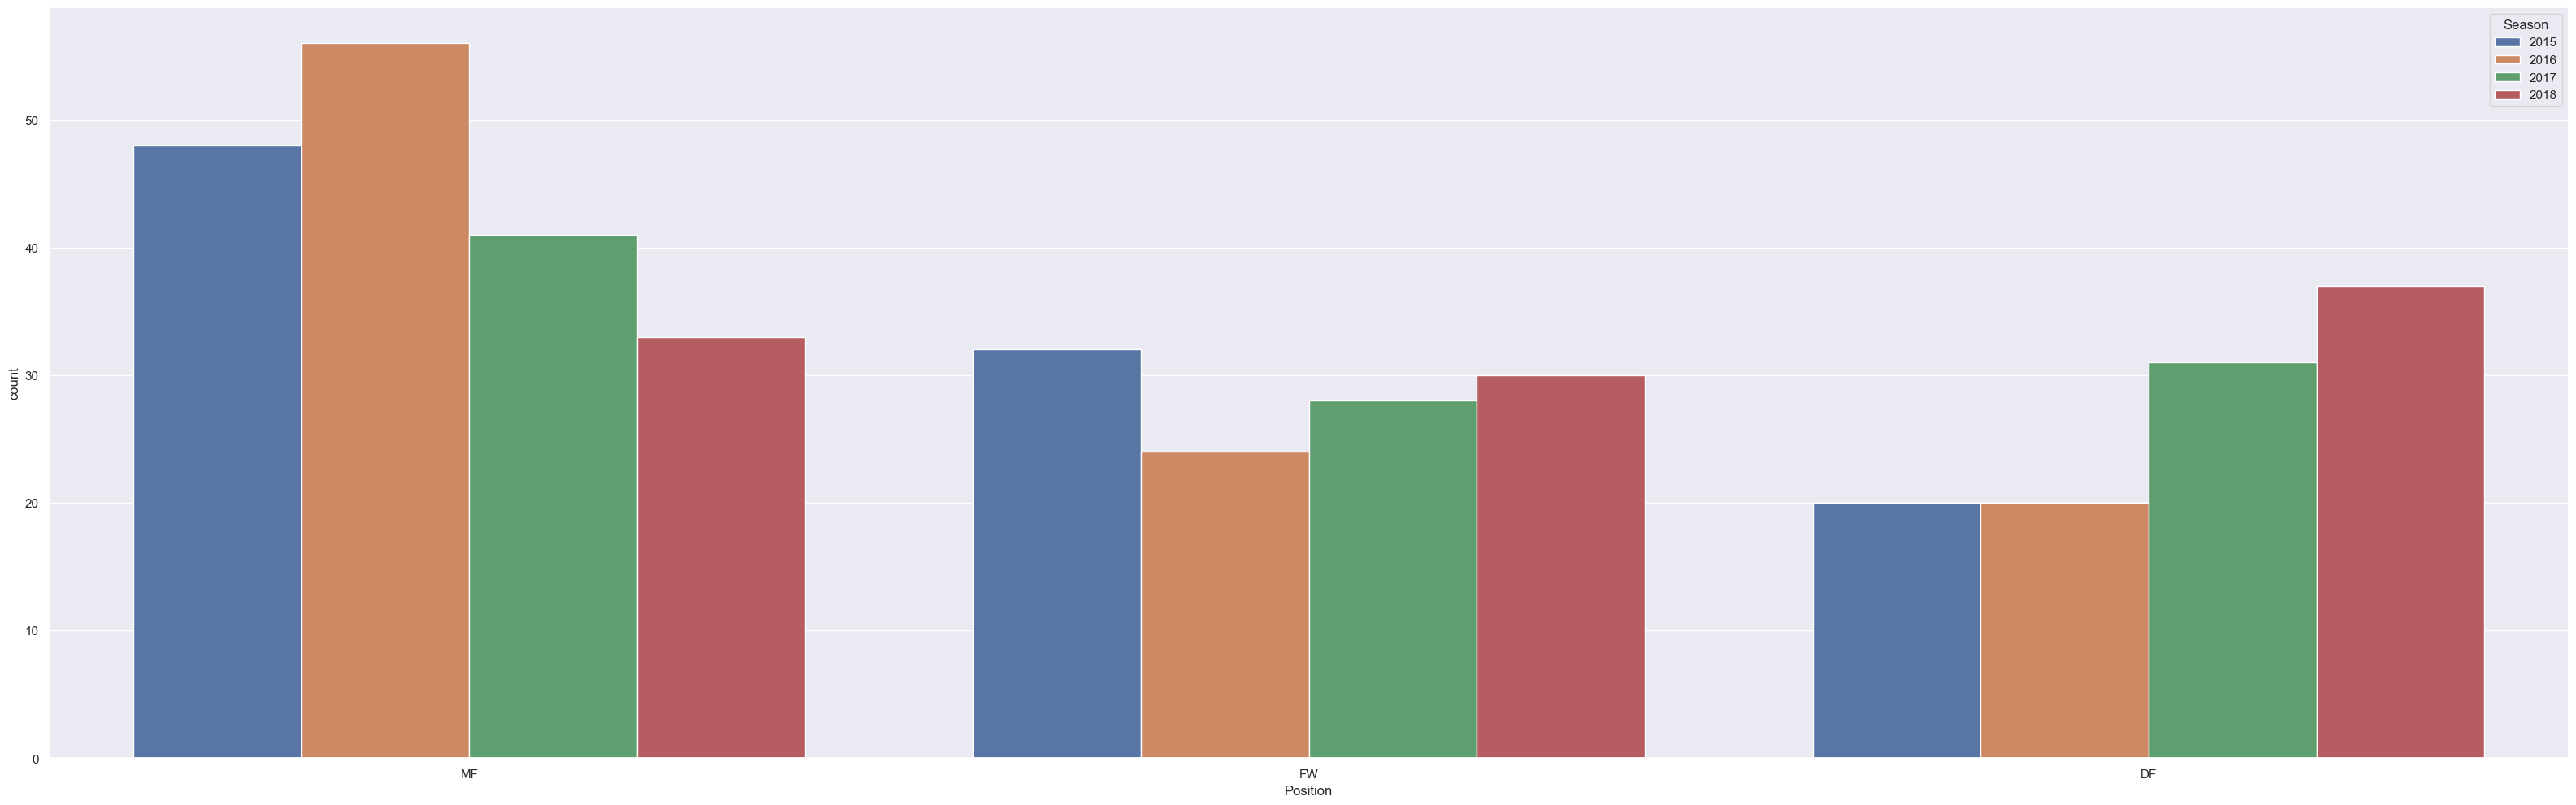

In [27]:
top_100_by_season = highest_value[highest_value["Season"] == 2015][:100]
top_100_by_season = pd.concat([top_100_by_season, highest_value[highest_value["Season"] == 2016][:100]])
top_100_by_season = pd.concat([top_100_by_season, highest_value[highest_value["Season"] == 2017][:100]])
top_100_by_season = pd.concat([top_100_by_season, highest_value[highest_value["Season"] == 2018][:100]])

sbn.countplot(top_100_by_season, x="Position", hue="Season")


<h4> Market Value and Club Honors </h4>

<p>
Can we directly tie Market value to the honors awarded by club? By breaking down Market value counts by season and using UEFA and the English Premier League we can see the following club honors for the 2015-2018 seasons. 

Domestic Honors:

<ul>
<li> Premier League Titles </li>
    <ol>
        <li> Leicester City: 1 [2015] </li>
        <li> Chelsea: 1 [2016] </li>
        <li> Manchester City: 2 [2017, 2018] </li>
    </ol>
<li> FA Cup </li>
    <ol>
        <li> Manchester United: 1 [2015] </li>
        <li> Arsenal: 1 [2016] </li>
        <li> Chelsea: 1 [2017] </li>
        <li> Manchester City: 1 [2018] </li>
    </ol>
<li> League Cup / Capital One Cup / Caraboa Cup </li>
    <ol>
        <li> Manchester City: 3 [2015, 2017, 2018] </li>
        <li> Manchester United: 1 [2016] </li>
    </ol>
<li> Europa League </li>
    <ol>
        <li> Manchester United: 1 [2016] </li>
        <li> Chelsea: 1 [2018] </li>
    </ol>
<li> UEFA Champions League </li>
    <ol>
        <li>Liverpool: 1 [2018]</li>
    </ol>
</ul>

</p>

<p>
Not shown but recognized are the UEFA Super Cup and Club World Cup due to no Premier League teams being honored in the given Seasons.
</p>

<p>
By Club, below are the rankings for total honors in the dataset: <br>

<ol>
    <li> Manchester City: 6 </li>
    <li> Chelsea and Manchester United [Tie]: 3 </li>
    <li> Arsenal, Leciester, Liverpool [Tie]: 1 </li>
</ol>

<br>

Given the ranking above, we should see a close tie to Market Value domination of the top 100 players to the respective clubs. Although we do see the expected clubs dominating the top 100, we also see Tottenham ranking as one of the average highest. For all 4 seasons, tottenham ranks in the top 3 of "most valuable players". 

</p>







<Axes: xlabel='Squad', ylabel='count'>

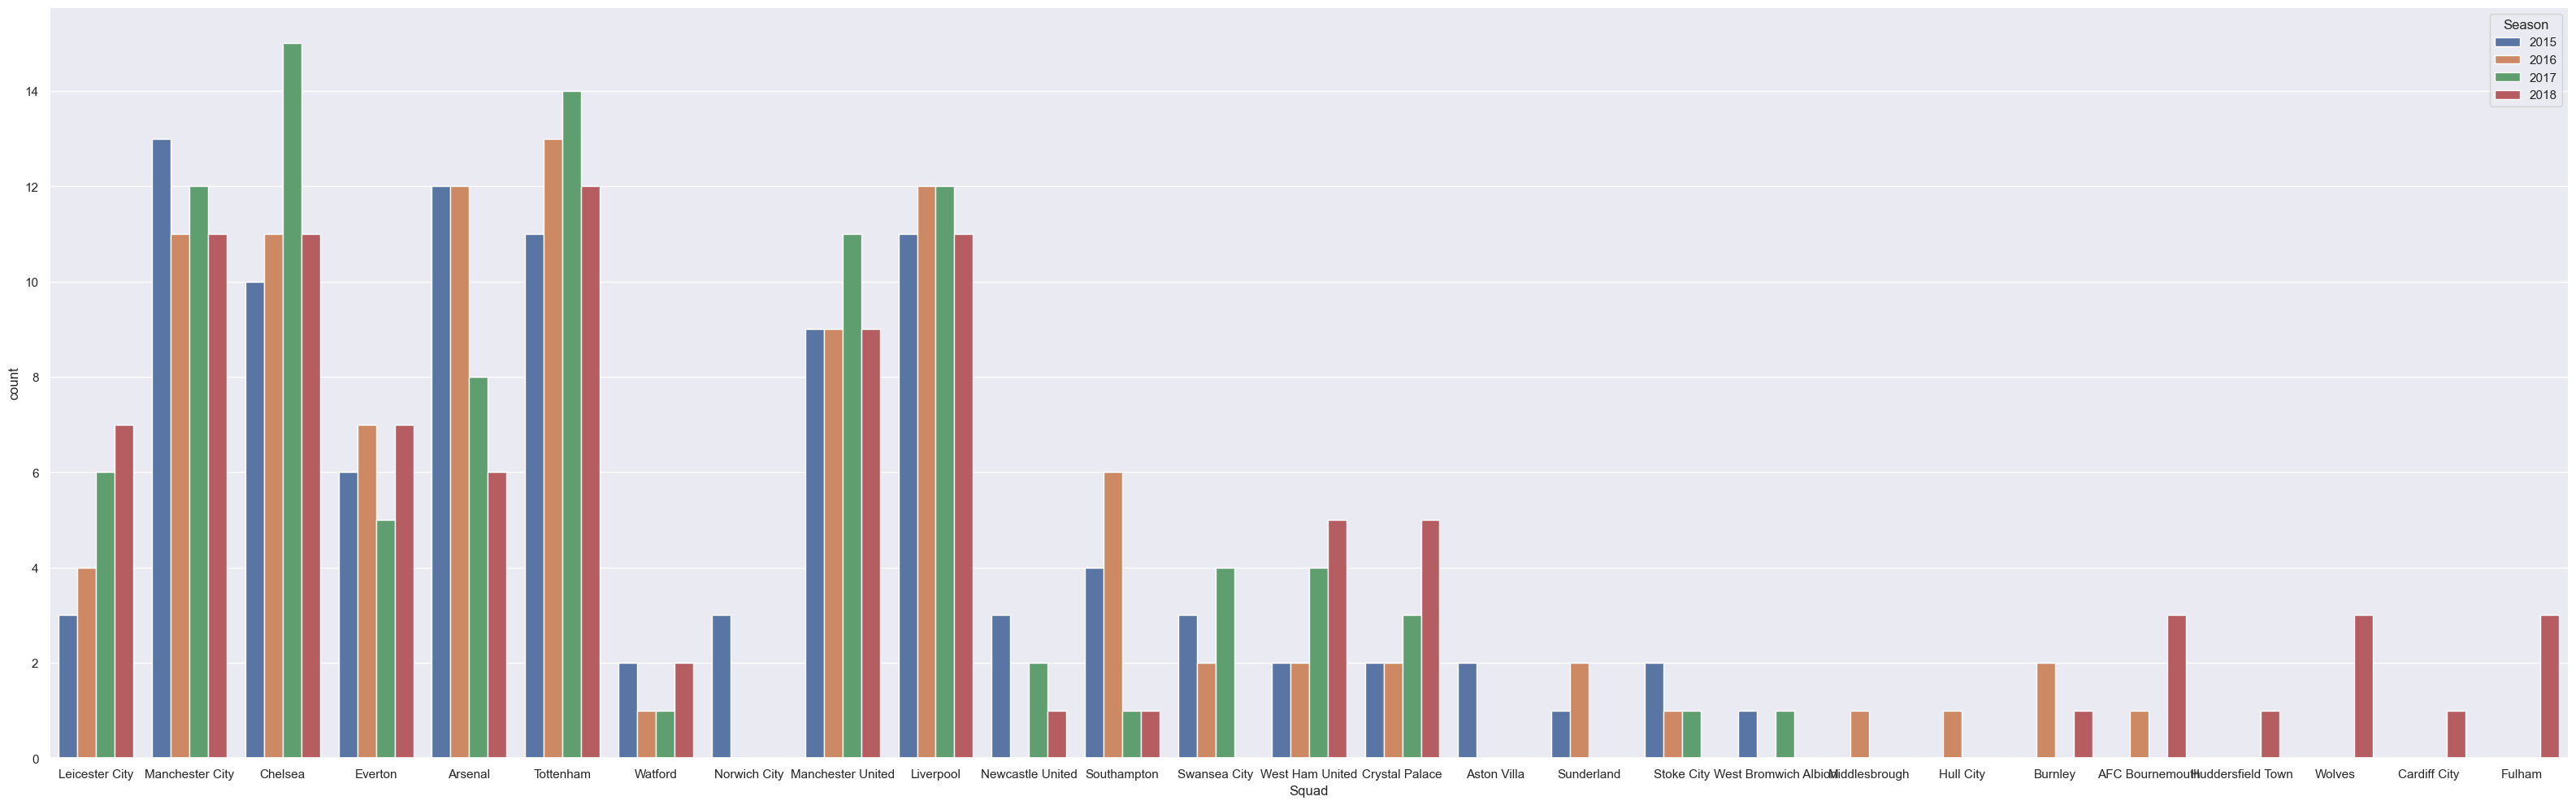

In [42]:
sbn.countplot(top_100_by_season, x="Squad", hue="Season")

/var/folders/cr/gwwkbgg11dn7gbbs06llw8800000gn/T/ipykernel_1093/3138789640.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(mf_top_100.corr(),vmin=-1, vmax=1,square=True,annot=True)


<Axes: >

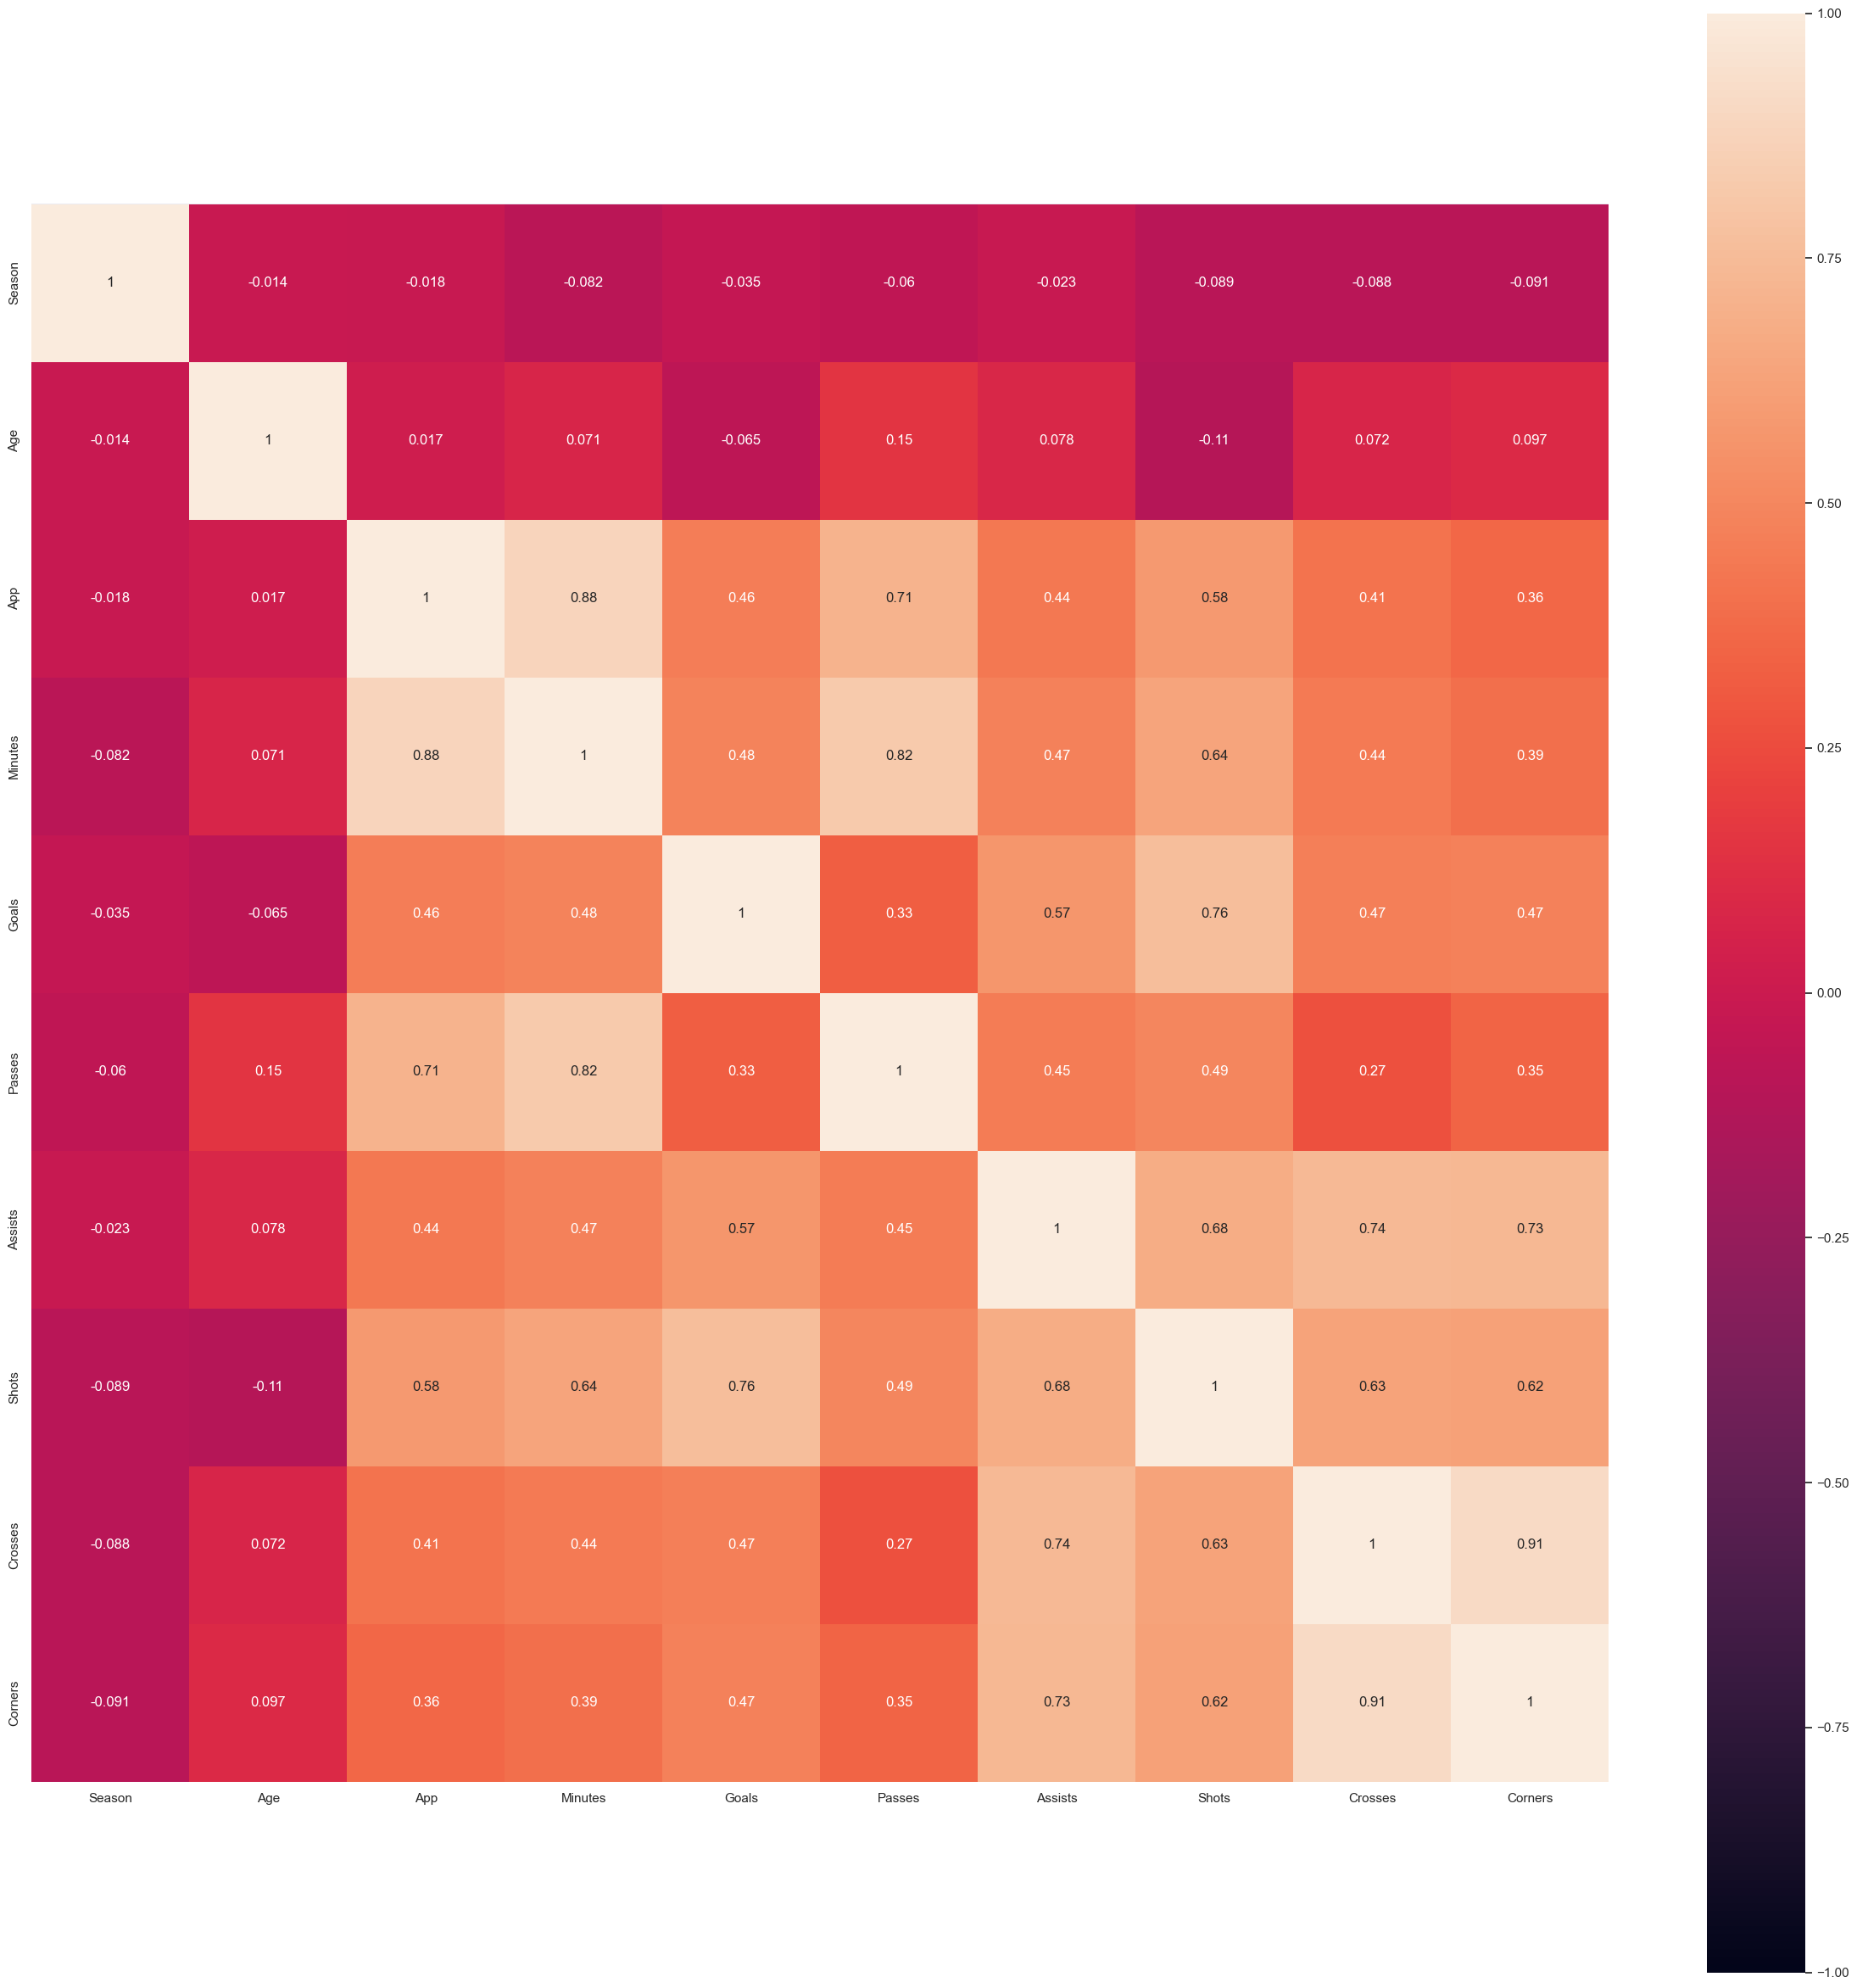

In [78]:
top_100_by_season = top_100_by_season.sort_values(by="Market Value", ascending=False)

mf_top_100 = top_100_by_season[top_100_by_season["Position"] == "MF"].loc[:,["Season","Age","Nation","Position","App","Minutes","Goals","Passes","Assists","Shots","Crosses","Corners", "Market Value"]]

mf_top_100

fig, ax = plt.subplots(figsize=(30, 30))

sbn.heatmap(mf_top_100.corr(),vmin=-1, vmax=1,square=True,annot=True)